<a href="https://colab.research.google.com/github/thiimdg/asd/blob/main/MadridRealState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projeto de Predição de Preços de Casas em Madrid

##1) Carregamento dos Dados e Visualização inicial do Dataset

In [92]:
import pandas as pd

dataset = pd.read_csv('./houses_Madrid.csv')
dataset.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


##2) Análise Exploratória Inicial

In [93]:
dataset.shape

(21742, 58)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [95]:
dataset.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


Análise de Correlação

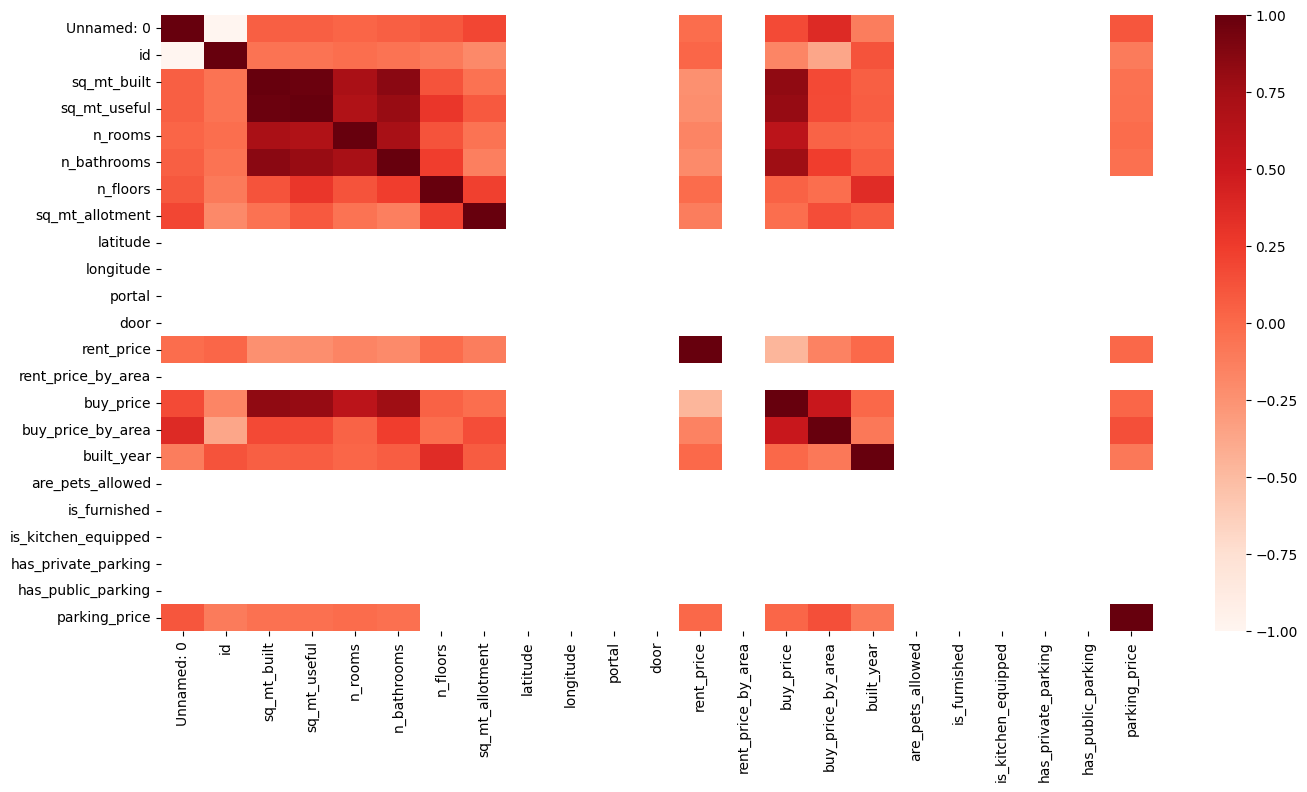

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(16, 8))
correlation_matrix = numeric_dataset.corr()
sns.heatmap(correlation_matrix, cmap='Reds')
plt.show()

In [97]:
correlation_matrix.corr()['buy_price'].sort_values(ascending=False)

,buy_price
buy_price,1.000000
sq_mt_built,0.939969
n_bathrooms,0.930285
sq_mt_useful,0.926821
n_rooms,0.850735
buy_price_by_area,0.549568
Unnamed: 0,0.231126
n_floors,-0.067420
parking_price,-0.206043
sq_mt_allotment,-0.211521


##3) Filtragem e limpeza dos Dados

In [98]:
fds = dataset.filter(['buy_price', 'sq_mt_built', 'n_bathrooms', 'n_rooms'])
fds.describe()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
count,2.174200e+04,21616.000000,21726.000000,21742.000000
mean,6.537356e+05,146.920892,2.091687,3.005749
std,7.820821e+05,134.181865,1.406992,1.510497
min,3.600000e+04,13.000000,1.000000,0.000000
25%,1.980000e+05,70.000000,1.000000,2.000000
50%,3.750000e+05,100.000000,2.000000,3.000000
75%,7.636000e+05,162.000000,2.000000,4.000000
max,8.800000e+06,999.000000,16.000000,24.000000


Lidando com Valores Nulos

In [99]:
fds.isnull().sum()

,0
buy_price,0
sq_mt_built,126
n_bathrooms,16
n_rooms,0


In [100]:
fds = fds.dropna()

In [101]:
fds.isnull().sum()
fds.head()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
0,85000,64.0,1.0,2
1,129900,70.0,1.0,3
2,144247,94.0,2.0,2
3,109900,64.0,1.0,2
4,260000,108.0,2.0,2


<Axes: xlabel='buy_price', ylabel='Density'>

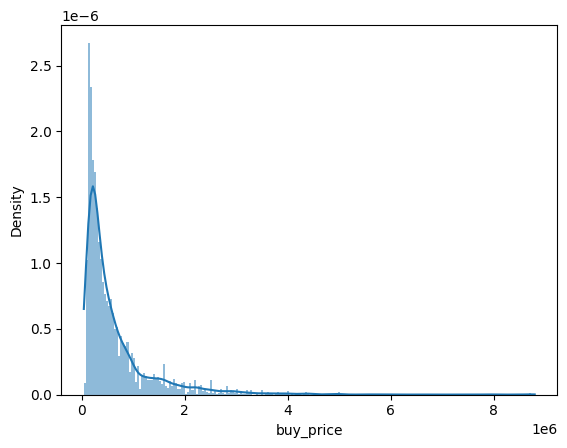

In [102]:
sns.histplot(fds['buy_price'], kde=True, stat="density", linewidth=0)

Análise Estatística do buy_price


In [103]:
min = fds['buy_price'].min()
max = fds['buy_price'].max()
med = fds['buy_price'].median()
avg = fds['buy_price'].mean()
q95 = fds['buy_price'].quantile(0.95)
print("min =", min)
print("avg =", avg)
print("med =", med)
print("max =", max)
print("95% =", q95)

min = 36000
avg = 636185.817037037
med = 370000.0
max = 8800000
95% = 2150000.0


In [104]:
fds = fds[fds['buy_price'] < 2150000.0]

<Axes: xlabel='sq_mt_built', ylabel='Density'>

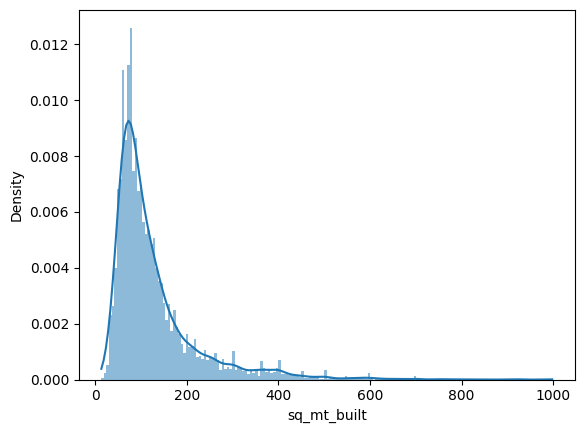

In [105]:
sns.histplot(fds['sq_mt_built'], kde=True, stat="density", linewidth=0)

Number of samples after sq_mt_built filtering: 20310


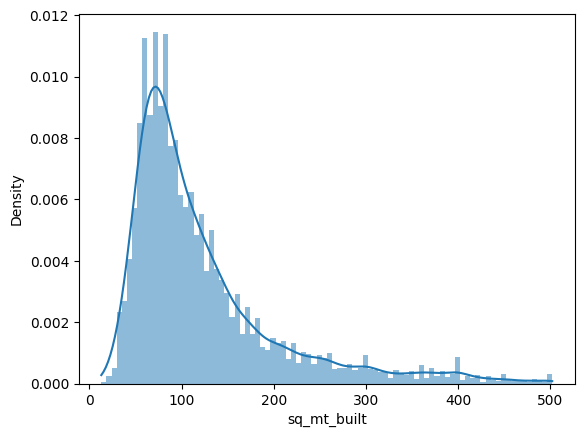

In [106]:
fds['sq_mt_built'].quantile(0.99)
fds = fds[fds['sq_mt_built'] < 505.0]
sns.histplot(fds['sq_mt_built'], kde=True, stat="density", linewidth=0)
print("Number of samples after sq_mt_built filtering:", len(fds))

<Axes: xlabel='n_bathrooms', ylabel='Density'>

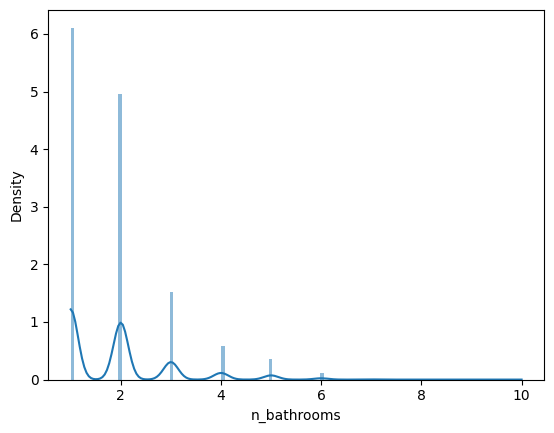

In [107]:
sns.histplot(fds['n_bathrooms'], kde=True, stat="density", linewidth=0)

Número de amostras após filtragenm: 19980


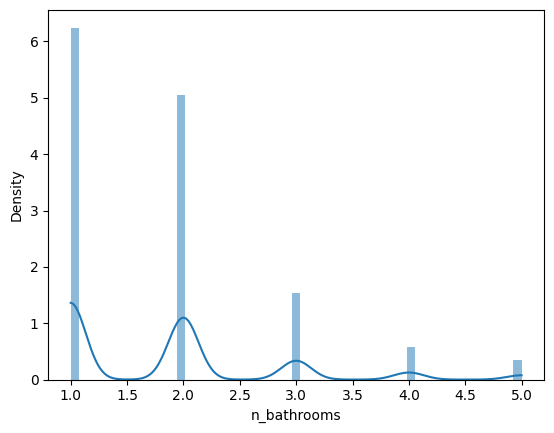

In [118]:
fds['n_bathrooms'].quantile(0.99)
fds = fds[fds['n_bathrooms'] <= 5.0]
sns.histplot(fds['n_bathrooms'], kde=True, stat="density", linewidth=0)
print("Número de amostras após filtragenm:", len(fds))

<Axes: xlabel='n_rooms', ylabel='Density'>

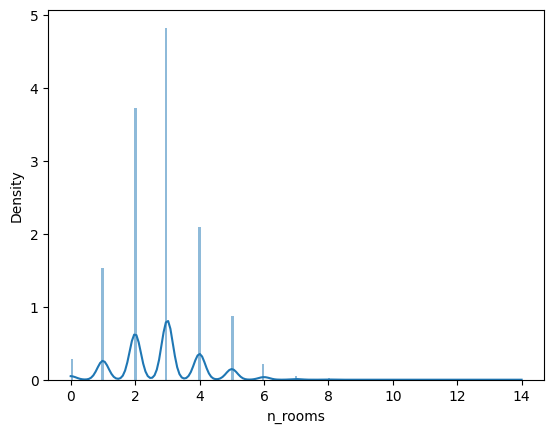

In [109]:
sns.histplot(fds['n_rooms'], kde=True, stat="density", linewidth=0)

In [111]:
fds.describe()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
count,1.998000e+04,19980.000000,19980.000000,19980.000000
mean,4.822739e+05,119.166717,1.817367,2.764164
std,4.076050e+05,77.724203,0.964004,1.190515
min,3.600000e+04,13.000000,1.000000,0.000000
25%,1.890000e+05,69.000000,1.000000,2.000000
50%,3.390000e+05,95.000000,2.000000,3.000000
75%,6.300000e+05,141.250000,2.000000,3.000000
max,2.145000e+06,502.000000,5.000000,6.000000


In [112]:
fds.corr()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
buy_price,1.000000,0.822032,0.766545,0.522993
sq_mt_built,0.822032,1.000000,0.837975,0.697580
n_bathrooms,0.766545,0.837975,1.000000,0.652290
n_rooms,0.522993,0.697580,0.652290,1.000000


In [113]:
X = fds.drop(['buy_price'], axis=1)
y = fds['buy_price']
print(X.describe())
print(y.describe())

        sq_mt_built   n_bathrooms       n_rooms
count  19980.000000  19980.000000  19980.000000
mean     119.166717      1.817367      2.764164
std       77.724203      0.964004      1.190515
min       13.000000      1.000000      0.000000
25%       69.000000      1.000000      2.000000
50%       95.000000      2.000000      3.000000
75%      141.250000      2.000000      3.000000
max      502.000000      5.000000      6.000000
count    1.998000e+04
mean     4.822739e+05
std      4.076050e+05
min      3.600000e+04
25%      1.890000e+05
50%      3.390000e+05
75%      6.300000e+05
max      2.145000e+06
Name: buy_price, dtype: float64


#Machine Learning Pipeline

Preparando os dados para o treinamento e teste

In [114]:
from sklearn.model_selection import train_test_split

X_train_ps, X_test_ps, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_ps)

StandardScaler()

In [116]:
X_train = scaler.transform(X_train_ps)
X_test  = scaler.transform(X_test_ps)

Treinamento dos modelos e resultados

=== LinearRegression() ===


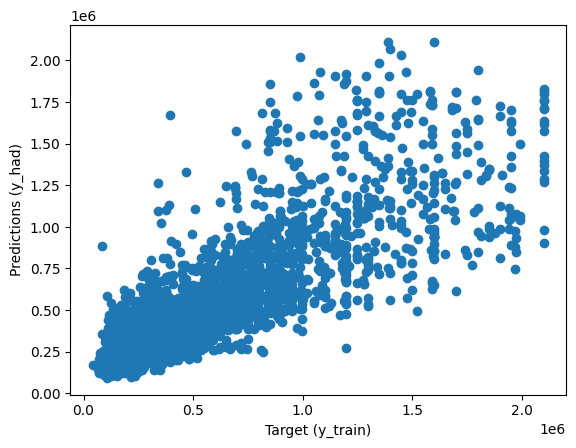

Mean Absolute Error: 147163.0965011313
Mean Squared Error: 48739586848.40806
Root Mean Squared Error: 220770.43925400896
R-squared score 0.5757875646101114
=== RandomForestRegressor() ===


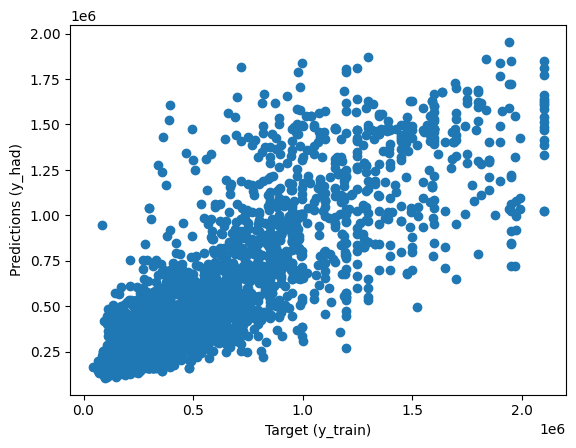

Mean Absolute Error: 135532.08274020095
Mean Squared Error: 43904143453.63026
Root Mean Squared Error: 209533.15597687697
R-squared score 0.6669293461823335


In [117]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_list = [ LinearRegression(),
               RandomForestRegressor(),
              ]

for m in model_list:
    print("===", m, "===")
    m.fit(X_train, y_train)
    y_hat = m.predict(X_test)
    plt.scatter(y_test, y_hat)
    plt.xlabel('Target (y_train)')
    plt.ylabel('Predictions (y_had)')
    plt.show()
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_hat, y_test))
    print("Mean Squared Error:", metrics.mean_squared_error(y_hat, y_test))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_hat, y_test)))
    print("R-squared score", metrics.r2_score(y_hat, y_test))

#Análise entre os Modelos e Conclusão

Este projeto teve como objetivo desenvolver modelos de machine learning para prever os preços de imóveis em Madrid com base em diferentes características. Dois modelos foram testados: Regressão Linear e Random Forest.

O Random Forest apresentou resultados superiores em todas as métricas em comparação com a Regressão Linear:

MAE: 135.460 vs. 147.163 (quanto menor melhor)

MSE: 43.834 B vs. 48.739 B (quanto menor melhor)

RMSE: 209.366 vs. 220.770 (quanto menor melhor)

R²: 0.667 vs. 0.576 (quanto mais próximo de 1 melhor)

Portanto, podemos concluir que o Random Forest é a melhor escolha **entre os dois modelos** para a aplicação nesse caso